# Linear Models
Models that make a prediction using a *linear function* of the input featurese

In [1]:
import sys
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import mglearn
import matplotlib.pyplot as plt

## Linear models for regression
For regression, the general prediction formula for a linear model looks as follows:

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

x[0] to x[*p*] denoes the features of a single data point, w and b are parameters of the model that are learned. ŷ  is the prediction the model makes.

w[0]: 0.393906  b: -0.031804


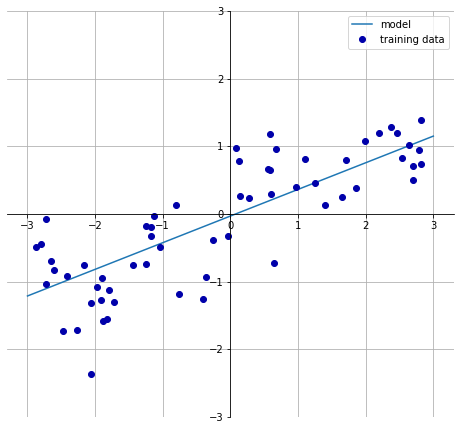

In [2]:
mglearn.plots.plot_linear_regression_wave()

Linear Models can be a powerful for datasets with more features than training data points.
There are many different linear models for regression. The difference is between how these models learn the parameters *w* and *b* from the training data. In linear regression there is no way to control for model complexity.

---
### Linear regression (aka ordinary least squares)
simplest and most classic linear method for regression. Learns the parameters w and b that minimize the mean squared error between predictions and the true regression targets,y, on the training set.
The mean squared error is the sum of the squared differences between the predictions and the true values.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


"w" parameters are called the slope, weights, or coefficients. and parameter "b" is the intercept.

In [4]:
print("Training set score: {:2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.670089
Test set score: 0.66


R^2, coefficient of determination, of 0.66 is not very good. With more features, linear models become more powerful, and there is a higher chance of overfitting.


In [5]:
X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


The discrepancy between performance on the training set and the test set is a clear sign of overfiiting, and therefore we should try to find a model that allows us to control complexity.


## Ridge Regression
adds an additional constraint to the ordinary least squares regression formula. To reduce the magnitude of coefficients to be as small as possible (and therefore each feature should have as little effect on the outcome as possible) and still have the model predict well, a particular form of regularization is added as a constraint. Ridge regression is L2 regularization.

In [6]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))


Training set score: 0.89
Test set score: 0.75


The trade off in training score for an increase in test score is an indication of the overfitting occuring in the ordinary least squares model.

The parameter *alpha* is used to tune the contraint, L2 regularization, added to the OLS model in Ridge regression. Increasing *alpha* forces coefficients to move more toward zero, decreasing the training set performance, but might help generalization

In [7]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test,y_test)))

Training set score: 0.79
Test set score: 0.64


Decreasing *alpha* allows the coefficients to be less restricted, as we approach zero the model resembles LinearRegression

In [8]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


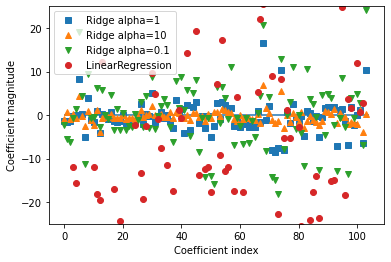

In [9]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

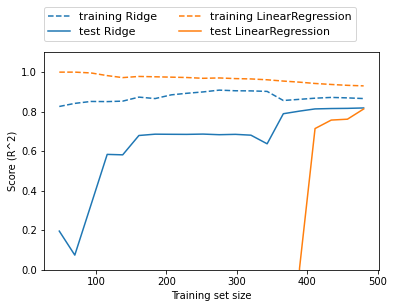

In [10]:
mglearn.plots.plot_ridge_n_samples()

 The lesson here is that with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance

### Lasso
Alternative to Ridge linear regrression.  Uses L1 Regularization to restrict coefficients as the added constraint. Using L1 regularization leads to some coefficients to be exactly zero, reducing the number of features (feature selection). And may provide a model easier to interpret.

In [11]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Both the training and test set perform quite badly, indicating that the model is underfitting the 4 of 105 features. We can decrease *alpha*, the regularization parameter that controls how strongly coefficients are pushed toward zero. Then increase the deault setting of max_iter (the maximum number of iterations to run).

In [12]:
lasso001 = Lasso(alpha=0.01, max_iter=1000000).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used :{}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used :33


We were able to fit a more complex model by decreasing the *alpha* parameter. If set alpha too low, we again remove the effect of regularization and end up overfitting, with a result similar to LinearRegression

In [13]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test,y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

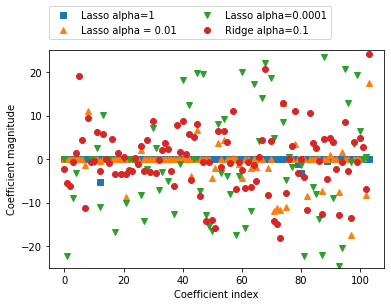

In [14]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_,'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## Linear models for classification
For linear models of regression the output is a linear function of the features: a line, a plane or a hyperplane. For linear models for classification, the decsion boundary is a linear function of the input. The many algorithms for learning linear models all differ in the following two ways: 
- The way in which they measure how well a particular combination of coefficients and intercept fits the training data
- If an what kind of regularization they use

Two most common linear classification algorithms are logistic regression, and linear support vector machines. Both are implemented, by default, with L2 regularization in the same way that Ridge does for regression. The strength of the regularization is called C, and higher values of C correspond to less regularization. 

/home/friend/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/home/friend/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


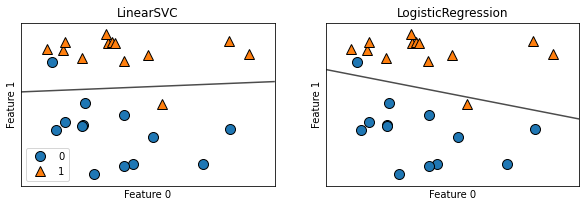

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                   ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend()


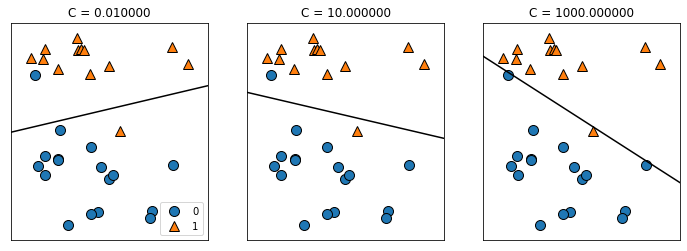

In [32]:
mglearn.plots.plot_linear_svc_regularization()

In [36]:
# LinearLogistic
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Training set score: 0.958
Test set score: 0.958


In [39]:
logreg100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.984
Test set score: 0.972


In [41]:
# introduce MORE regularization into the model
logreg001 = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


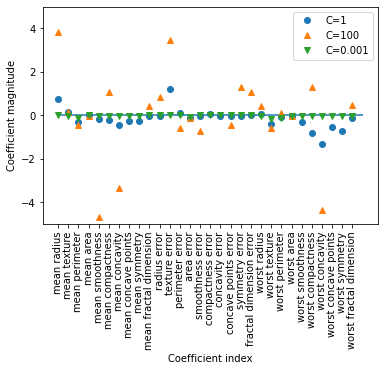

In [43]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


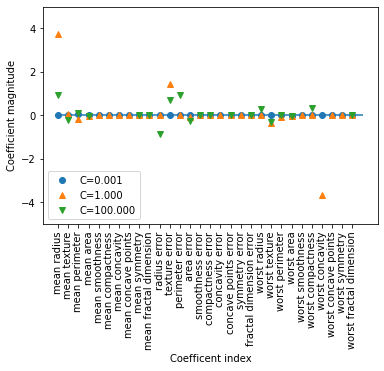

In [49]:
for C, marker in zip([0.001,1,100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver="liblinear", max_iter=10000).fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.xlabel("Coefficent index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5,5)
plt.legend(loc=3)


---
## Linear Models for multiclass classification